In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ema_workbench.analysis import parcoords

C:\Users\Asus\Documents\Python venvs\ABM\Lib\site-packages\ema_workbench\em_framework\__init__.py:101: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")


# Sensitivity Analysis

In [2]:
# Load the combined results
df = pd.read_csv("./data/sensitivity_analysis_results_final.csv")

# Assign 'time_step' resetting after each 300 steps per group
df_filtered = df.copy()
df_filtered['time_step'] = df_filtered.groupby(['varied_parameter', 'varied_value']).cumcount() + 1
df_filtered['Exit Speed'] = df_filtered['Cumulative Exited Agents'] / df_filtered['time_step']

In [6]:
df_x = df_filtered.copy()
df_x.sort_values(['Cumulative Exited Agents'], ascending=False, inplace=True)
df_x

,Active Agents,Exited Agents,Cumulative Exited Agents,Agents per Cell - Main Exit,Agents per Cell - South West Exit,Agents per Cell - North West Exit,Agents per Cell - East Exit,Agents per Cell - South East Exit,Agents per Cell - First South Exit,Agents per Cell - First North Exit,Agents per Cell - Stairs North,Agents per Cell - Stairs South,Agents per Cell - North Stairs,Agents per Cell - South Stairs,varied_parameter,varied_value,time_step,Exit Speed
1504,8,0,1193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,number_of_visitors,1200.0,297,4.016835
1505,8,0,1193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,number_of_visitors,1200.0,298,4.003356
1509,8,0,1193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,number_of_visitors,1200.0,302,3.950331
1508,8,0,1193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,number_of_visitors,1200.0,301,3.963455
1507,8,0,1193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,number_of_visitors,1200.0,300,3.976667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4566,1001,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,2.5,0.25,2.25,alarm_timer,50.0,37,0.000000
4567,1001,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.5,0.25,1.50,alarm_timer,50.0,38,0.000000
4568,1001,0,0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.5,0.25,2.75,alarm_timer,50.0,39,0.000000
4569,1001,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,2.0,0.50,2.00,alarm_timer,50.0,40,0.000000


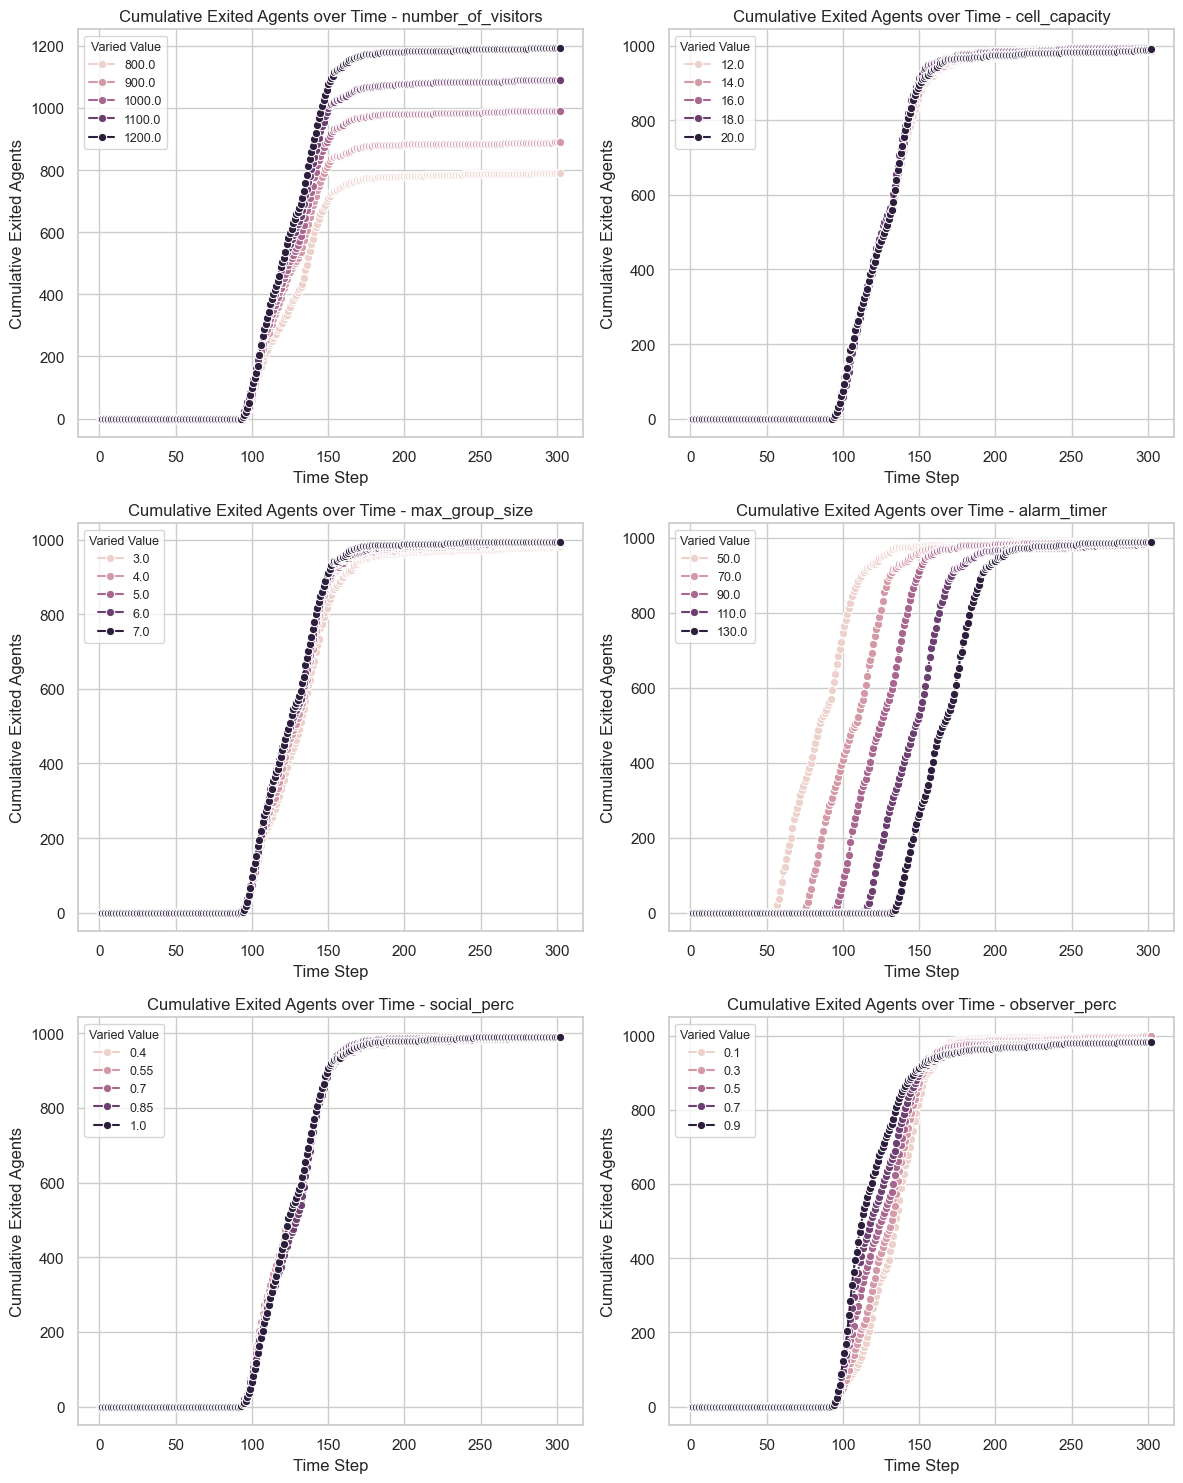

In [3]:
df_cum_agents = df_filtered.copy()

# Get unique parameters
parameters = df_cum_agents['varied_parameter'].unique()

# Set plot style
sns.set(style="whitegrid")

fig, axes = plt.subplots(3,2, figsize=(12,15))

# Iterate through each parameter and create plots
for i, param in enumerate(parameters):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    # Filter data for the current parameter
    subset = df_cum_agents[df_cum_agents['varied_parameter'] == param]
    
    # Plot lines for each varied value
    sns.lineplot(
        data=subset,
        x='time_step',
        y='Cumulative Exited Agents',
        hue='varied_value',
        marker='o',
        ax=ax
    )
    
    # Customize the plot
    ax.set_title(f'Cumulative Exited Agents over Time - {param}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Cumulative Exited Agents')
    
    # Modify the legend with smaller font sizes
    legend = ax.legend(title='Varied Value', fontsize=9)  # Set legend labels font size
    legend.get_title().set_fontsize(9)  # Set legend title font size

plt.tight_layout()    
plt.show()

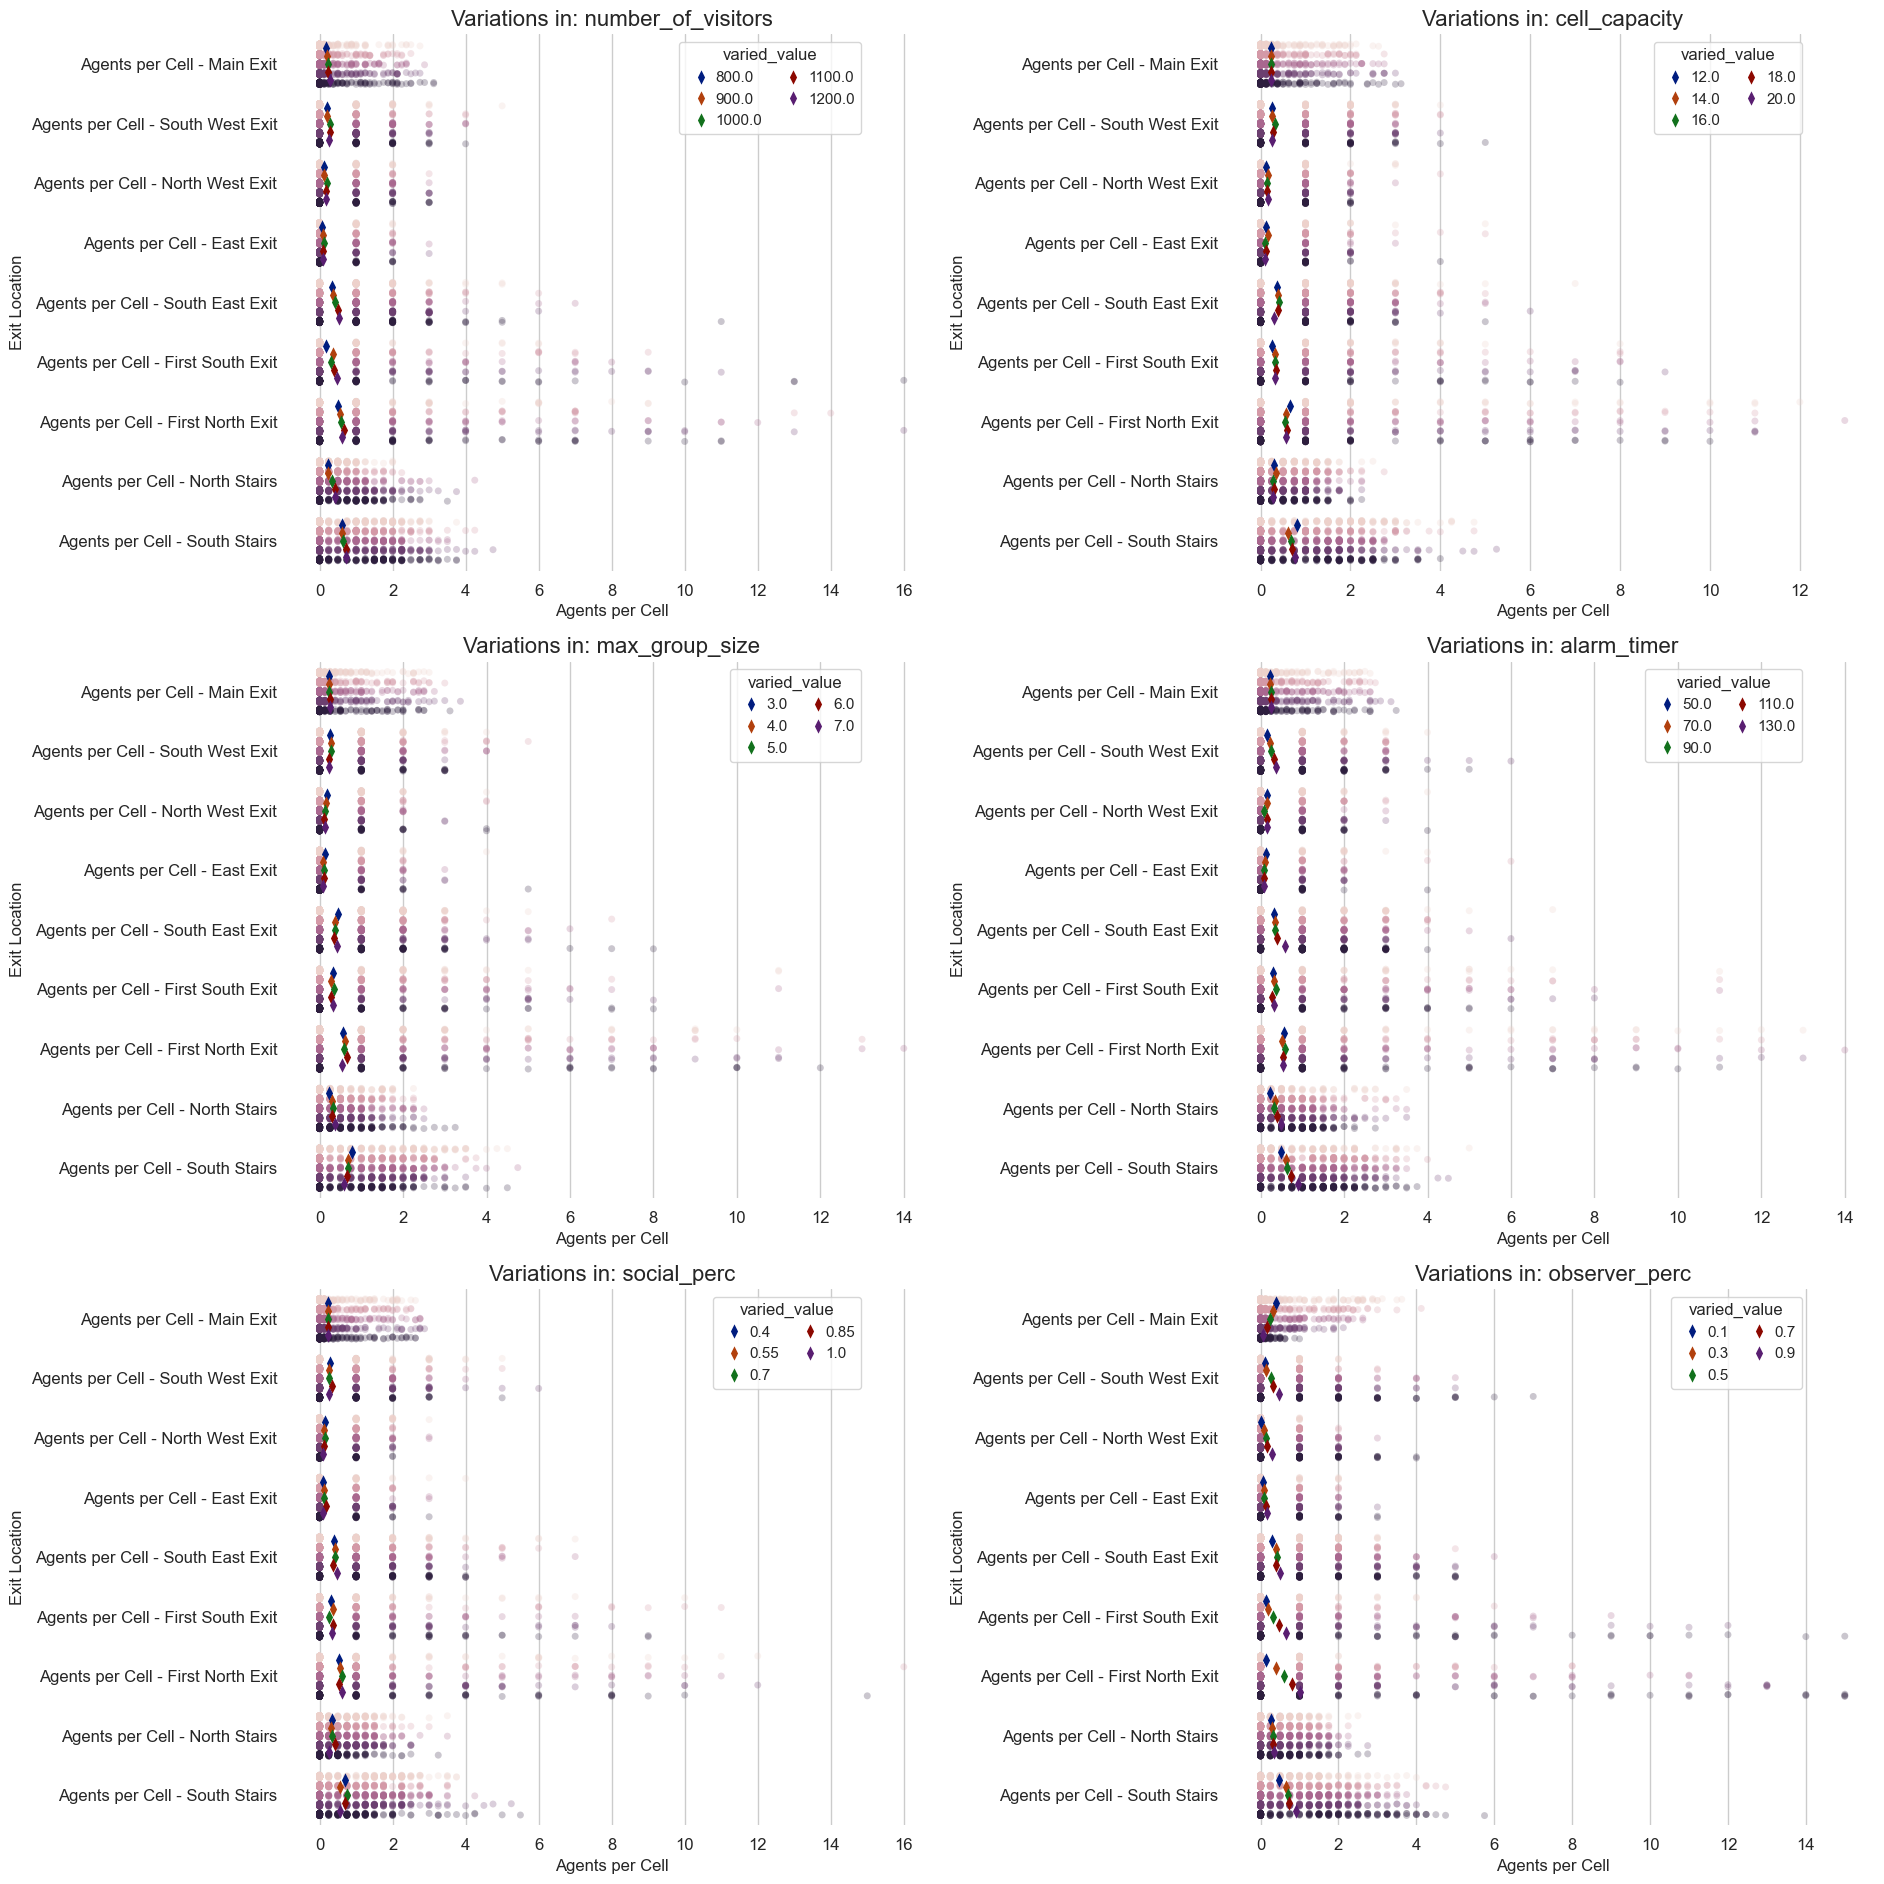

In [7]:
df_exit_density = df_filtered.copy()

variables_to_plot = [
    "Agents per Cell - Main Exit",
    "Agents per Cell - South West Exit",
    "Agents per Cell - North West Exit",
    "Agents per Cell - East Exit",
    "Agents per Cell - South East Exit",
    "Agents per Cell - First South Exit",
    "Agents per Cell - First North Exit",
    "Agents per Cell - North Stairs",
    "Agents per Cell - South Stairs"
]

fig, axes = plt.subplots(3, 2, figsize=(19, 19))

# Iterate through each varied parameter and create a plot
for i,var in enumerate(df_exit_density['varied_parameter'].unique()):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    df_sub = df_exit_density[df_exit_density['varied_parameter'] == var]
    
    # Melt the dataframe to long-form or tidy representation for seaborn
    df_melted = df_sub.melt(id_vars=["varied_value"], value_vars=variables_to_plot, var_name="measurement", value_name="value")
    
    sns.stripplot(
        data=df_melted, x="value", y="measurement", hue="varied_value",
        dodge=True, alpha=.25, zorder=1, legend=False, ax=ax
    )
    sns.pointplot(
        data=df_melted, x="value", y="measurement", hue="varied_value",
        dodge=.8 - .8 / 3, palette="dark", errorbar=None,
        markers="d", markersize=4, linestyle="none", ax=ax
    )
    
    ax.set_title(f"Variations in: {var}", fontsize=16)
    ax.set_xlabel("Agents per Cell")
    ax.set_ylabel("Exit Location")
    ax.tick_params(axis='both', which='major', labelsize=12)
    sns.despine(bottom=True, left=True)
    sns.move_legend(ax, loc="upper right", bbox_to_anchor=(0.9,1), ncol=2, frameon=True, columnspacing=1, handletextpad=0)

plt.tight_layout()    
plt.show()

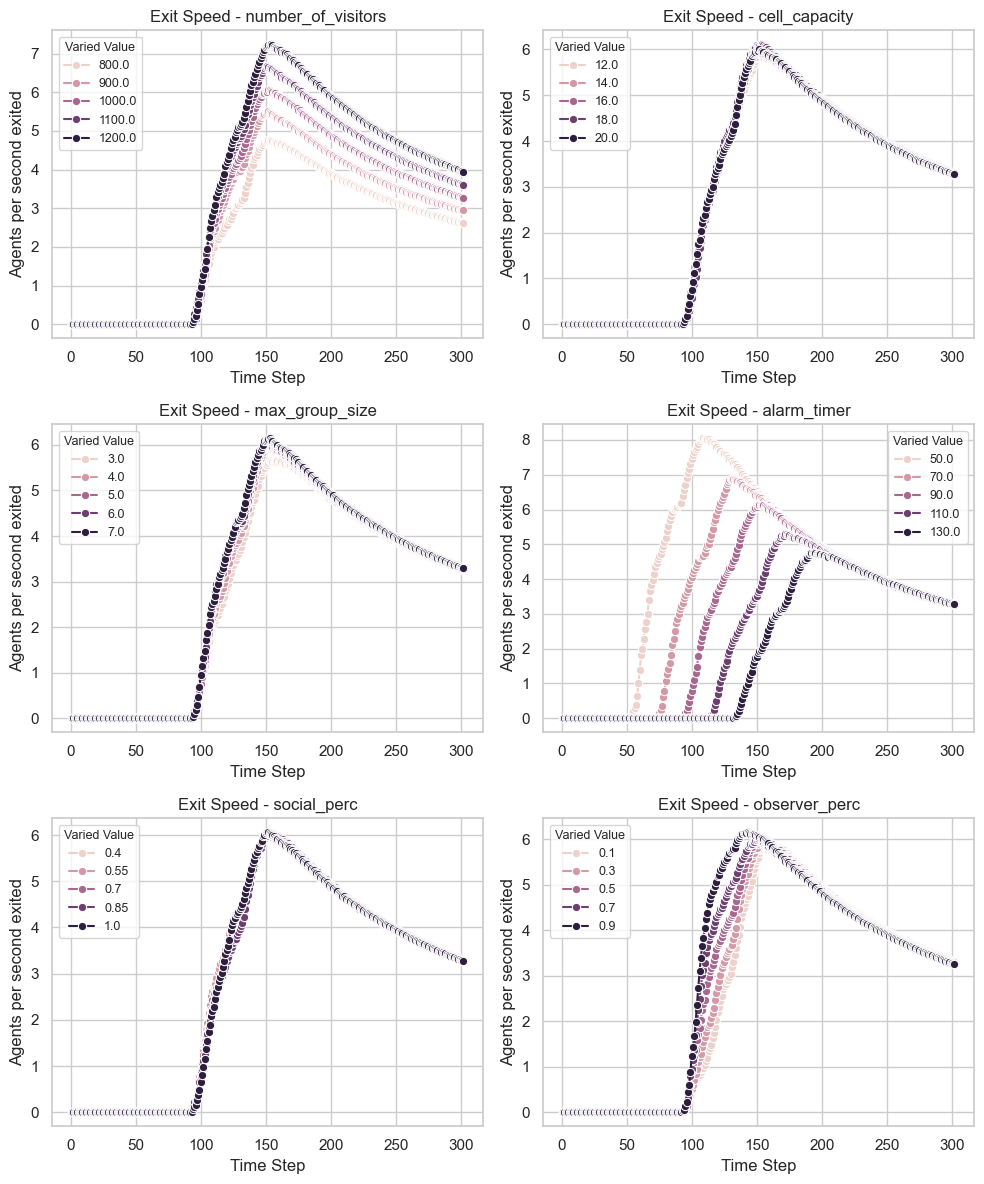

In [92]:
df_exit_speed = df_filtered.copy()

# Get unique parameters
parameters = df_exit_speed['varied_parameter'].unique()

# Set plot style
sns.set(style="whitegrid")

fig, axes = plt.subplots(3,2, figsize=(10,12))

# Iterate through each parameter and create plots
for i, param in enumerate(parameters):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    # Filter data for the current parameter
    subset = df_exit_speed[df_exit_speed['varied_parameter'] == param]
    
    # Plot lines for each varied value
    sns.lineplot(
        data=subset,
        x='time_step',
        y='Exit Speed',
        hue='varied_value',
        marker='o',
        ax=ax
    )
    
    # Customize the plot
    ax.set_title(f'Exit Speed - {param}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Agents per second exited')
    # Modify the legend with smaller font sizes
    legend = ax.legend(title='Varied Value', fontsize=9)  # Set legend labels font size
    legend.get_title().set_fontsize(9)  # Set legend title font size

plt.tight_layout()    
plt.show()

# Results analysis

## Base case

In [119]:
df = pd.read_csv('./data/model_data_basecase.csv')
df['timestep'] = df.groupby(['run_id']).cumcount() + 1

In [82]:
import pandas as pd

# Define the output variables and their renamed versions
rename_mapping = {
    "Agents per Cell - Main Exit": "Main Exit",
    "Agents per Cell - South West Exit": "South West Exit",
    "Agents per Cell - North West Exit": "North West Exit",
    "Agents per Cell - East Exit": "East Exit",
    "Agents per Cell - South East Exit": "South East Exit",
    "Agents per Cell - First South Exit": "First South Exit",
    "Agents per Cell - First North Exit": "First North Exit",
    "Cumulative Exited Agents": "Max Exited Agents"
}

# Read and process the basecase CSV
basecase_df = (
    pd.read_csv("./data/model_data_basecase.csv")
      .rename(columns=rename_mapping)                      # Rename columns
      .rename(columns={'run_id': 'replication_id'})        # Rename 'run_id' to 'replication_id'
      .assign(timestep=lambda df: df.index + 1,            # Add 'timestep' column
              scenario_id='Base')                           # Assign 'scenario_id' as 'Base'
)

# Define exit density variables (excluding 'Max Exited Agents' and 'Exit Speed' if present)
exit_density_vars = [var for var in rename_mapping.values() if var not in ['Max Exited Agents', 'Exit Speed']]

# Define exit weights: 8 for 'Main Exit', 1 for others
exit_weights = {exit_name: 8 if exit_name == 'Main Exit' else 1 for exit_name in exit_density_vars}

# Calculate weighted sum of exits per replication
weighted_sum = basecase_df.groupby('replication_id')[exit_density_vars].sum().mul(pd.Series(exit_weights))

# Get maximum cumulative exited agents per replication
max_exited = basecase_df.groupby('replication_id')['Max Exited Agents'].max()

# Calculate percentage of agents exited through each exit per replication
percentage = weighted_sum.divide(max_exited, axis=0)

# Calculate mean percentage per exit across all replications
mean_percentage = percentage.mean().reset_index()
mean_percentage.columns = ['exit_name', 'Mean_Percentage_Agents_Exited']

# Calculate mean of maximum cumulative exited agents across all replications
mean_max_exited_agents = max_exited.mean()

# Create final aggregated DataFrame
final_aggregated_df = mean_percentage.copy()
final_aggregated_df['scenario_id'] = 'Base'
final_aggregated_df['Max Exited Agents'] = mean_max_exited_agents

# Pivot the DataFrame for better readability
final_aggregated_pivot = final_aggregated_df.pivot(index='scenario_id', 
                                                  columns='exit_name', 
                                                  values='Mean_Percentage_Agents_Exited').reset_index()

# Merge the mean max cumulative exited agents into the pivoted DataFrame
final_aggregated_pivot = final_aggregated_pivot.merge(
    pd.DataFrame({
        'scenario_id': ['Base'],
        'Max Exited Agents': [mean_max_exited_agents]
    }),
    on='scenario_id'
)

# Optional: Format the percentages as actual percentage values
final_aggregated_pivot[exit_density_vars] = final_aggregated_pivot[exit_density_vars] * 100

# Remove the MultiIndex from columns if present
final_aggregated_pivot.columns.name = None


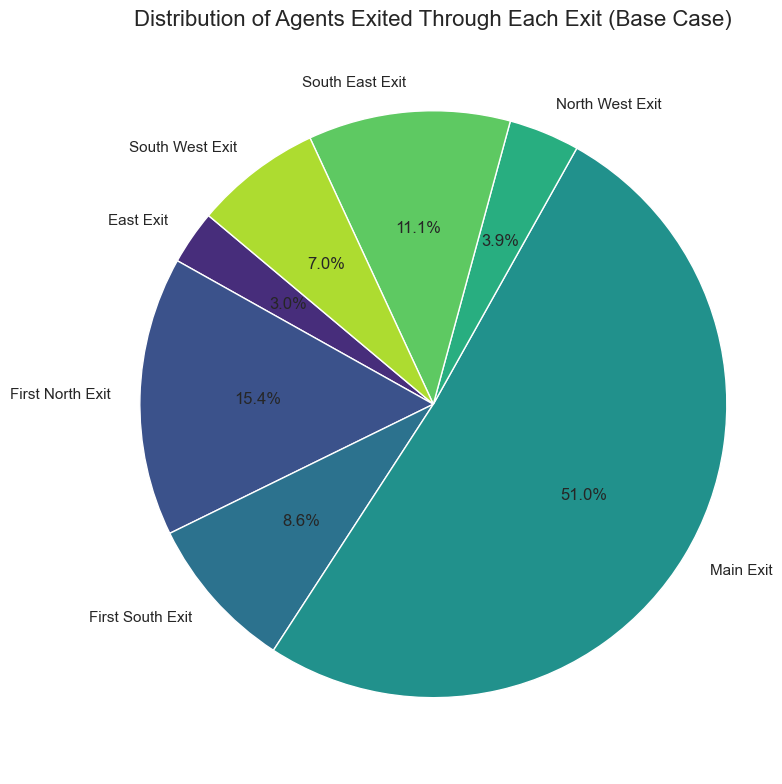

In [84]:
df_piechart = final_aggregated_pivot.copy()

# Melt the DataFrame to long format for easier plotting
melted_df = df_piechart.melt(id_vars=['scenario_id', 'Max Exited Agents'], 
                               var_name='Exit', 
                               value_name='Mean_Percentage_Agents_Exited')

# Data for pie chart (exclude 'Max Exited Agents')
pie_data = melted_df[melted_df['Exit'] != 'Max Exited Agents']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(pie_data['Mean_Percentage_Agents_Exited'], 
        labels=pie_data['Exit'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('viridis', len(pie_data)))

plt.title('Distribution of Agents Exited Through Each Exit (Base Case)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

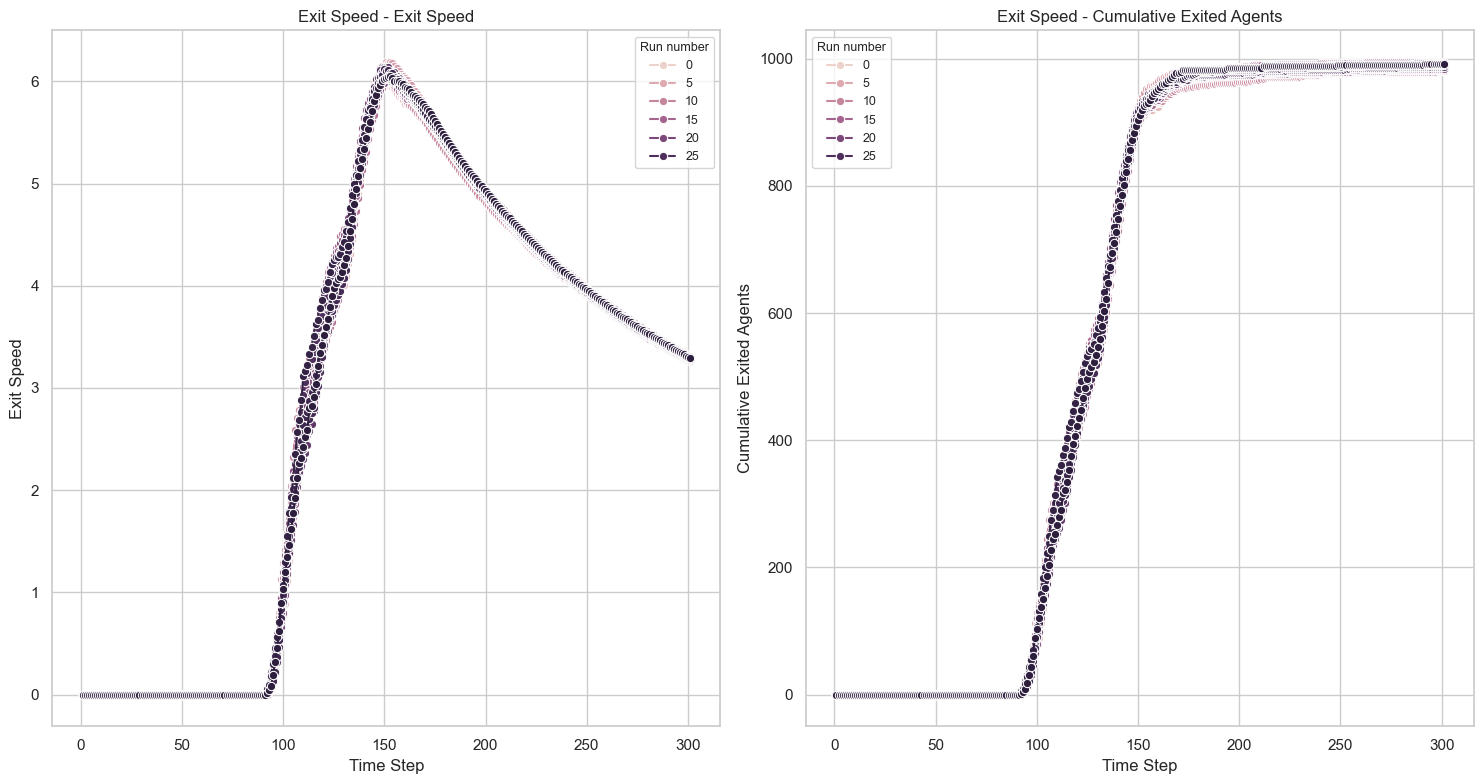

In [126]:
# Get unique parameters
parameters = ['Exit Speed', 'Cumulative Exited Agents']

# Set plot style
sns.set(style="whitegrid")

fig, axes = plt.subplots(1,2, figsize=(15,8))

# Iterate through each parameter and create plots
for i, param in enumerate(parameters):
    ax = axes[i]
    # Filter data for the current parameter
    subset = df[param]
    
    # Plot lines for each varied value
    sns.lineplot(
        data=df,
        x='timestep',
        y=param,
        hue='run_id',
        marker='o',
        ax=ax
    )
    
    # Customize the plot
    ax.set_title(f'Exit Speed - {param}')
    ax.set_xlabel('Time Step')
    
    # Modify the legend with smaller font sizes
    legend = ax.legend(title='Run number', fontsize=9)  # Set legend labels font size
    legend.get_title().set_fontsize(9)  # Set legend title font size
plt.tight_layout()    
plt.show()

## Scenario analysis

In [67]:
# Define the output variables to plot
output_vars = [
    "Agents per Cell - Main Exit",
    "Agents per Cell - South West Exit",
    "Agents per Cell - North West Exit",
    "Agents per Cell - East Exit",
    "Agents per Cell - South East Exit",
    "Agents per Cell - First South Exit",
    "Agents per Cell - First North Exit",
    "Cumulative Exited Agents"
]

# Create a mapping to rename variables by removing 'Agents per Cell - '
rename_mapping = {
    var: var.replace("Agents per Cell - ", "") for var in output_vars if "Agents per Cell - " in var
}
rename_mapping["Cumulative Exited Agents"] = "Cumulative Exited Agents"  # Keep as is

# Initialize an empty list to store dataframes
df_list = []

# Function to process each CSV file
def process_csv(file_path, scenario_label):
    df = pd.read_csv(file_path)
    
    # Rename the columns to remove 'Agents per Cell - '
    df.rename(columns=rename_mapping, inplace=True)
    
    # Add 'timestep' column (index starts at 0, so add 1)
    df['timestep'] = df.index + 1
    
    # Assign 'scenario_id'
    df['scenario_id'] = scenario_label
    
    return df

# Loop through scenario files 1 to 12
for i in range(1, 13):
    file_pattern = f"./data/model_data_scenario{i}_all_runs.csv"
    scenario_label = i
    df = process_csv(file_pattern, scenario_label)
    df_list.append(df)

# Process the basecase CSV file
basecase_df = process_csv("./data/model_data_basecase.csv", "Base")
basecase_df.rename(columns={'run_id': 'replication_id'}, inplace=True)
df_list.append(basecase_df)

# Concatenate all dataframes
combined_df = pd.concat(df_list, ignore_index=True)

# List of renamed variables for plotting
renamed_vars = list(rename_mapping.values())

# Define exit density variables
exit_density_vars = [var for var in renamed_vars if var not in ['Cumulative Exited Agents', 'Exit Speed']]

# Define exit weights: 8 for 'Main Exit', 1 for others
exit_weights = {exit_name: 8 if exit_name == 'Main Exit' else 1 for exit_name in exit_density_vars}

# Group by 'scenario_id' and 'replication_id'
grouped = combined_df.groupby(['scenario_id', 'replication_id'])

# Initialize lists to store results
percentage_list = []
max_cum_exited_list = []

# Iterate through each group to calculate the percentage per exit and capture max cumulative exited agents
for (scenario, replication), group in grouped:
    # Find the maximum of 'Cumulative Exited Agents' for this run
    max_cum_exited = group['Cumulative Exited Agents'].max()
    
    # Append the max_cum_exited to the list
    max_cum_exited_list.append({
        'scenario_id': scenario,
        'replication_id': replication,
        'Max Exited Agents': max_cum_exited
    })
    
    # Iterate through each exit to calculate percentage
    for exit_name in exit_density_vars:
        # Sum of exit densities for this exit over all timesteps
        sum_exit_density = group[exit_name].sum()
        
        # Apply the respective weight
        weighted_exit_sum = sum_exit_density * exit_weights[exit_name]
        
        # Calculate percentage
        percentage = weighted_exit_sum / max_cum_exited
        
        # Append to the list
        percentage_list.append({
            'scenario_id': scenario,
            'replication_id': replication,
            'exit_name': exit_name,
            'percentage_exited': percentage
        })

# Create DataFrames from the lists
percentage_df = pd.DataFrame(percentage_list)
max_cum_exited_df = pd.DataFrame(max_cum_exited_list)

# Compute mean percentage per scenario per exit
mean_percentage_per_scenario_exit = percentage_df.groupby(['scenario_id', 'exit_name'])['percentage_exited'].mean().reset_index()

# Rename the column for clarity
mean_percentage_per_scenario_exit.rename(columns={'percentage_exited': 'Mean_Percentage_Agents_Exited'}, inplace=True)

# Format the percentage as a percentage (e.g., 0.85 -> 85%)
mean_percentage_per_scenario_exit['Mean_Percentage_Agents_Exited'] = mean_percentage_per_scenario_exit['Mean_Percentage_Agents_Exited'] * 100

# Compute mean of max cumulative exited agents per scenario
mean_max_cum_exited_agents = max_cum_exited_df.groupby('scenario_id')['Max Exited Agents'].mean().reset_index()

# Merge the mean percentage and mean max cumulative exited agents
final_aggregated_df = pd.merge(mean_percentage_per_scenario_exit, mean_max_cum_exited_agents, on='scenario_id')

# Pivot the DataFrame for better readability 
final_aggregated_pivot = final_aggregated_df.pivot(index='scenario_id', 
                                                  columns='exit_name', 
                                                  values='Mean_Percentage_Agents_Exited').reset_index()

# Merge the Mean_Max_Cumulative_Exited_Agents into the pivoted DataFrame
final_aggregated_pivot = pd.merge(final_aggregated_pivot, mean_max_cum_exited_agents, on='scenario_id')

# Optional: Rename columns for clarity if needed
final_aggregated_pivot.columns.name = None  # Remove the aggregation name

# Display the final aggregated DataFrame
aggregated_df = final_aggregated_pivot


In [104]:
import pandas as pd

# Define the output variables to plot
output_vars = [
    "Agents per Cell - Main Exit",
    "Agents per Cell - South West Exit",
    "Agents per Cell - North West Exit",
    "Agents per Cell - East Exit",
    "Agents per Cell - South East Exit",
    "Agents per Cell - First South Exit",
    "Agents per Cell - First North Exit",
    "Cumulative Exited Agents"
]

# Create a mapping to rename variables by removing 'Agents per Cell - '
rename_mapping = {
    var: var.replace("Agents per Cell - ", "") for var in output_vars if "Agents per Cell - " in var
}
rename_mapping["Cumulative Exited Agents"] = "Cumulative Exited Agents"  # Keep as is

# Initialize an empty list to store dataframes
df_list = []

# Function to process each CSV file
def process_csv(file_path, scenario_label):
    df = pd.read_csv(file_path)
    
    # Rename the columns to remove 'Agents per Cell - '
    df.rename(columns=rename_mapping, inplace=True)
    
    # Add 'timestep' column (index starts at 0, so add 1)
    df['timestep'] = df.index + 1
    
    # Assign 'scenario_id'
    df['scenario_id'] = scenario_label
    
    return df

# Loop through scenario files 1 to 12
for i in range(1, 13):
    file_pattern = f"./data/model_data_scenario{i}_all_runs.csv"
    scenario_label = i
    df = process_csv(file_pattern, scenario_label)
    df_list.append(df)

# Process the basecase CSV file
basecase_df = process_csv("./data/model_data_basecase.csv", "Base")
basecase_df.rename(columns={'run_id': 'replication_id'}, inplace=True)
df_list.append(basecase_df)

# Concatenate all dataframes
combined_df = pd.concat(df_list, ignore_index=True)

combined_df['timestep'] = combined_df.groupby(['scenario_id', 'replication_id']).cumcount() + 1

# List of renamed variables for plotting
renamed_vars = list(rename_mapping.values())

# Define exit density variables
exit_density_vars = [var for var in renamed_vars if var not in ['Cumulative Exited Agents', 'Exit Speed']]

# Define exit weights: 8 for 'Main Exit', 1 for others
exit_weights = {exit_name: 8 if exit_name == 'Main Exit' else 1 for exit_name in exit_density_vars}

# Group by 'scenario_id' and 'replication_id'
grouped = combined_df.groupby(['scenario_id', 'replication_id'])

# Initialize lists to store results
percentage_list = []
max_cum_exited_list = []
time_to_max_list = []  # New list to store adjusted timesteps

# Iterate through each group to calculate the percentage per exit, capture max cumulative exited agents, and calculate time to max
for (scenario, replication), group in grouped:
    # Find the maximum of 'Cumulative Exited Agents' for this run
    max_cum_exited = group['Cumulative Exited Agents'].max()
    
    # Append the max_cum_exited to the list
    max_cum_exited_list.append({
        'scenario_id': scenario,
        'replication_id': replication,
        'Max Exited Agents': max_cum_exited
    })
    
    # Find the first timestep where 'Cumulative Exited Agents' equals max_cum_exited
    first_max_timestep = group[group['Cumulative Exited Agents'] == max_cum_exited]['timestep'].min()
    
    # Subtract 90 from the timestep
    adjusted_time = first_max_timestep - 90
    
    # Append the adjusted time to the list
    time_to_max_list.append({
        'scenario_id': scenario,
        'replication_id': replication,
        'Adjusted_Time_to_Max_Exited_Agents': adjusted_time
    })
    
    # Iterate through each exit to calculate percentage
    for exit_name in exit_density_vars:
        # Sum of exit densities for this exit over all timesteps
        sum_exit_density = group[exit_name].sum()
        
        # Apply the respective weight
        weighted_exit_sum = sum_exit_density * exit_weights[exit_name]
        
        # Calculate percentage
        percentage = weighted_exit_sum / max_cum_exited if max_cum_exited != 0 else 0
        
        # Append to the list
        percentage_list.append({
            'scenario_id': scenario,
            'replication_id': replication,
            'exit_name': exit_name,
            'percentage_exited': percentage
        })

# Create DataFrames from the lists
percentage_df = pd.DataFrame(percentage_list)
max_cum_exited_df = pd.DataFrame(max_cum_exited_list)
time_to_max_df = pd.DataFrame(time_to_max_list)  # DataFrame for adjusted times

# Compute mean percentage per scenario per exit
mean_percentage_per_scenario_exit = percentage_df.groupby(['scenario_id', 'exit_name'])['percentage_exited'].mean().reset_index()

# Rename the column for clarity
mean_percentage_per_scenario_exit.rename(columns={'percentage_exited': 'Mean_Percentage_Agents_Exited'}, inplace=True)

# Format the percentage as a percentage (e.g., 0.85 -> 85%)
mean_percentage_per_scenario_exit['Mean_Percentage_Agents_Exited'] = mean_percentage_per_scenario_exit['Mean_Percentage_Agents_Exited'] * 100

# Compute mean of max cumulative exited agents per scenario
mean_max_cum_exited_agents = max_cum_exited_df.groupby('scenario_id')['Max Exited Agents'].mean().reset_index()

# Compute mean of adjusted time to reach max exited agents per scenario
mean_time_to_max = time_to_max_df.groupby('scenario_id')['Adjusted_Time_to_Max_Exited_Agents'].mean().reset_index()

# Merge the mean percentage and mean max cumulative exited agents
final_aggregated_df = pd.merge(mean_percentage_per_scenario_exit, mean_max_cum_exited_agents, on='scenario_id')

# Merge the mean time to max into the aggregated DataFrame
final_aggregated_df = pd.merge(final_aggregated_df, mean_time_to_max, on='scenario_id')

# Pivot the DataFrame for better readability 
final_aggregated_pivot = final_aggregated_df.pivot(index='scenario_id', 
                                                  columns='exit_name', 
                                                  values='Mean_Percentage_Agents_Exited').reset_index()

# Merge the mean max cumulative exited agents into the pivoted DataFrame
final_aggregated_pivot = pd.merge(final_aggregated_pivot, mean_max_cum_exited_agents, on='scenario_id')

# Merge the mean time to max into the pivoted DataFrame
final_aggregated_pivot = pd.merge(final_aggregated_pivot, mean_time_to_max, on='scenario_id')

# Optional: Rename columns for clarity if needed
final_aggregated_pivot.columns.name = None  # Remove the aggregation name
final_aggregated_pivot.rename(columns={'Adjusted_Time_to_Max_Exited_Agents': 'Evacuation Time'}, inplace=True)

# Display the final aggregated DataFrame
aggregated_df = final_aggregated_pivot

print(aggregated_df)


   scenario_id  East Exit  First North Exit  First South Exit  Main Exit  \
0            1   3.534051         17.568129          9.995692  46.435454   
1            2   2.557197         18.033900          6.294181  58.473189   
2            3   3.567908         18.416556         21.237101  24.135788   
3            4   3.663162          7.992465          3.780976  68.795951   
4            5   4.445112         12.079688         14.470899  46.004819   
5            6   3.794555         14.190651          8.290722  34.243749   
6            7   3.430143         25.487345         18.448570  30.891138   
7            8   2.638207         17.037366          8.031846  38.615981   
8            9   3.035217          6.311370          3.035946  64.761098   
9           10   3.153198         11.118085          4.886900  61.673421   
10          11   2.975008         10.781504          4.810526  78.134357   
11          12   3.830984         16.501314         13.580526  26.315765   
12        Ba

['Main Exit', 'South West Exit', 'North West Exit', 'East Exit', 'South East Exit', 'First South Exit', 'First North Exit', 'Max Exited Agents', 'Evacuation Time']


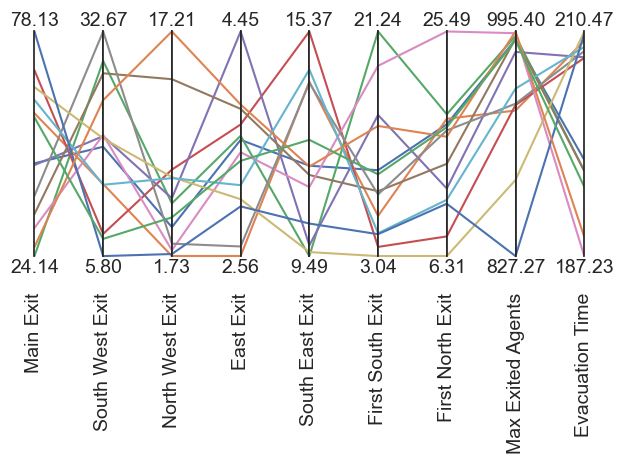

In [105]:
renamed_vars = ['Max Exited Agents' if var == 'Cumulative Exited Agents' else var for var in renamed_vars] + ['Evacuation Time']
print(renamed_vars)
# Select specific columns from the reference_set to create the outcomes DataFrame
outcomes = aggregated_df.loc[:, renamed_vars]

# Determine the limits for the parallel coordinates plot based on the selected outcomes
limits = parcoords.get_limits(outcomes)

# Create a ParallelAxes object with the determined limits
axes = parcoords.ParallelAxes(limits)

# Plot the outcomes DataFrame on the parallel coordinates axes
axes.plot(outcomes)

In [106]:
aggregated_df

,scenario_id,East Exit,First North Exit,First South Exit,Main Exit,North West Exit,South East Exit,South West Exit,Max Exited Agents,Evacuation Time
0,1,3.534051,17.568129,9.995692,46.435454,3.719085,11.856015,18.879369,989.400000,197.200000
1,2,2.557197,18.033900,6.294181,58.473189,1.725624,14.055895,14.425410,936.233333,209.500000
2,3,3.567908,18.416556,21.237101,24.135788,5.359657,9.491129,29.142124,992.100000,196.066667
3,4,3.663162,7.992465,3.780976,68.795951,7.683633,15.371026,8.456219,940.366667,207.733333
4,5,4.445112,12.079688,14.470899,46.004819,5.710815,9.772283,20.152816,980.100000,207.800000
5,6,3.794555,14.190651,8.290722,34.243749,13.916089,11.614442,27.666768,990.200000,196.033333
6,7,3.430143,25.487345,18.448570,30.891138,2.132097,11.297197,20.291655,994.100000,187.233333
7,8,2.638207,17.037366,8.031846,38.615981,2.583222,14.023139,32.668384,941.300000,208.433333
8,9,3.035217,6.311370,3.035946,64.761098,7.171081,9.595865,19.873453,884.266667,210.466667
9,10,3.153198,11.118085,4.886900,61.673421,7.096910,14.374937,14.333144,952.600000,208.866667


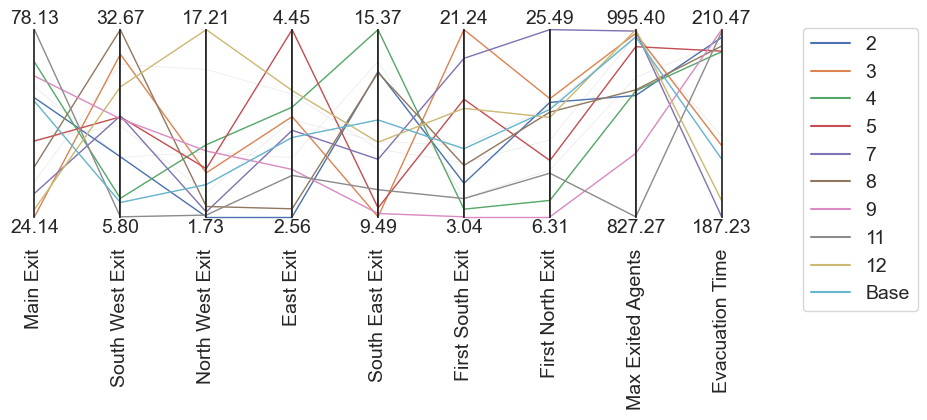

In [107]:
# Set the color palette for plotting
colors = sns.color_palette()

# Combine all outcomes into a single DataFrame
all_data = pd.DataFrame({k: v for k, v in outcomes.items()})

# Get unique indices for the maximum and minimum values across all objectives
indices = pd.concat([all_data.idxmax(), all_data.idxmin()]).unique()
indices = np.unique(np.append(indices, 12)) 
# Determine the limits for the parallel coordinates plot
limits = parcoords.get_limits(all_data)

# Create a ParallelAxes object with the determined limits
paraxes = parcoords.ParallelAxes(limits)

# Plot all data in light grey for background
paraxes.plot(all_data, color='lightgrey', lw=0.5, alpha=0.5)

# Plot the unique maximum and minimum lines with different colors
for i, (index, row) in enumerate(all_data.iloc[indices].sort_index().iterrows()):
    if index != 12:
        paraxes.plot(row, color=colors[i], lw=1, label=str(index+1))
    else:
        paraxes.plot(row, color=colors[i], lw=1, label='Base')

# Create a legend to identify the unique lines
paraxes.legend()

# Get the current figure and set its size
fig = plt.gcf()
fig.set_size_inches((8, 4))

# Display the plot
plt.show()